In [1]:
import pandas as pd
import os 

In [2]:
carpeta1="MesJunio"
carpeta2="MesJulio"

In [3]:
def listar_archivos_csv(carpeta):
    return [os.path.join(carpeta,archivo) for archivo 
            in os.listdir(carpeta) if 
            archivo.endswith('.csv')]

In [4]:
archivos_carpeta1=listar_archivos_csv(carpeta1)
archivos_carpeta2=listar_archivos_csv(carpeta2)

In [5]:
archivos_csv=archivos_carpeta1+archivos_carpeta2

In [6]:
dataframes=[pd.read_csv(archivo) for archivo in archivos_csv]

In [7]:
df_conbinado=pd.concat(dataframes,ignore_index=True)

In [8]:
df_conbinado['Mb_dl']=df_conbinado['l_thrp_bits_dl']/1000000
df_conbinado['Mb_ul']=df_conbinado['l_thrp_bits_ul']/1000000
df_conbinado['totalMb']=df_conbinado['Mb_dl']+df_conbinado['Mb_ul']
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [9]:
df_or=df_conbinado.groupby(['fecha', 'altan_site_id']).agg({'totalMb': 'sum'}).reset_index()
df_or.head()

,fecha,altan_site_id,totalMb
0,2024-06-01,7,2.218672e+06
1,2024-06-01,8,1.708228e+06
2,2024-06-01,9,1.706564e+06
3,2024-06-01,10,4.844851e+06
4,2024-06-01,11,3.225259e+06


In [10]:
df_or['fecha'] = pd.to_datetime(df_or['fecha'])
print(df_or.dtypes)

fecha            datetime64[ns]
altan_site_id             int64
totalMb                 float64
dtype: object


In [11]:
df_or['dia_semana'] = df_or['fecha'].dt.day_name(locale="es_Es")
df_or.head()

,fecha,altan_site_id,totalMb,dia_semana
0,2024-06-01,7,2.218672e+06,Sábado
1,2024-06-01,8,1.708228e+06,Sábado
2,2024-06-01,9,1.706564e+06,Sábado
3,2024-06-01,10,4.844851e+06,Sábado
4,2024-06-01,11,3.225259e+06,Sábado


In [12]:
df_or.head()

,fecha,altan_site_id,totalMb,dia_semana
0,2024-06-01,7,2.218672e+06,Sábado
1,2024-06-01,8,1.708228e+06,Sábado
2,2024-06-01,9,1.706564e+06,Sábado
3,2024-06-01,10,4.844851e+06,Sábado
4,2024-06-01,11,3.225259e+06,Sábado


In [13]:
filas_sabado = df_or[df_or['dia_semana'] == 'Sábado']
filas_sabado.head()

,fecha,altan_site_id,totalMb,dia_semana
0,2024-06-01,7,2.218672e+06,Sábado
1,2024-06-01,8,1.708228e+06,Sábado
2,2024-06-01,9,1.706564e+06,Sábado
3,2024-06-01,10,4.844851e+06,Sábado
4,2024-06-01,11,3.225259e+06,Sábado


In [14]:
sabado=filas_sabado.groupby('fecha').agg({'totalMb':'sum'}).reset_index()
sabado.head(10)

,fecha,totalMb
0,2024-06-01,2.378064e+10
1,2024-06-08,2.360662e+10
2,2024-06-15,2.420491e+10
3,2024-06-22,2.400101e+10
4,2024-06-29,2.443357e+10
5,2024-07-06,2.557161e+10
6,2024-07-13,2.478391e+10
7,2024-07-20,2.435316e+10
8,2024-07-27,2.437990e+10


In [15]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

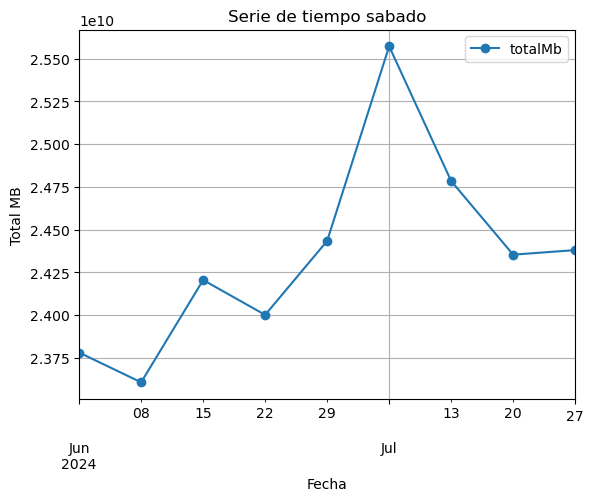

In [16]:
sabado.plot(x='fecha', y='totalMb', kind='line', marker='o')
# Mostrar la gráfica
plt.title('Serie de tiempo sabado')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.grid()
plt.show()

In [53]:
filas_domingo= df_or[df_or['dia_semana'] == 'Domingo']
filas_domingo.head()

,fecha,altan_site_id,totalMb,dia_semana
6776,2024-06-02,7,2.164679e+06,Domingo
6777,2024-06-02,8,1.647068e+06,Domingo
6778,2024-06-02,9,1.614287e+06,Domingo
6779,2024-06-02,10,4.360957e+06,Domingo
6780,2024-06-02,11,3.193201e+06,Domingo


In [54]:
domingo=filas_domingo.groupby('fecha').agg({'totalMb':'sum'}).reset_index()
domingo.head()

,fecha,totalMb
0,2024-06-02,2.344779e+10
1,2024-06-09,2.299213e+10
2,2024-06-16,2.368888e+10
3,2024-06-23,2.357364e+10
4,2024-06-30,2.389543e+10


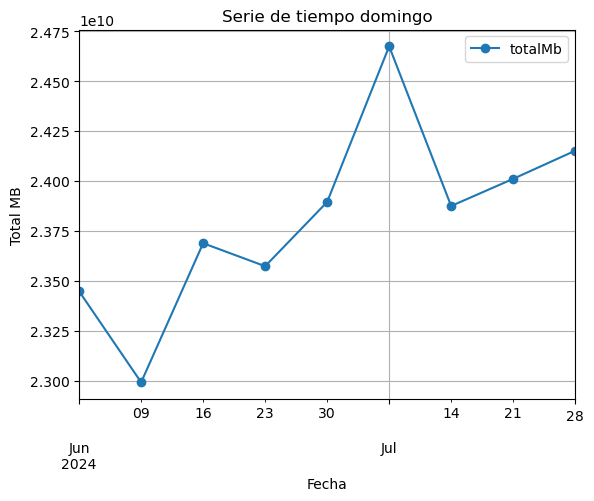

In [55]:
domingo.plot(x='fecha', y='totalMb', kind='line', marker='o')
# Mostrar la gráfica
plt.title('Serie de tiempo domingo')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.grid()
plt.show()

In [56]:
filas_lunes= df_or[df_or['dia_semana'] == 'Lunes']
filas_lunes.head()

,fecha,altan_site_id,totalMb,dia_semana
13552,2024-06-03,7,2.393952e+06,Lunes
13553,2024-06-03,8,2.140948e+06,Lunes
13554,2024-06-03,9,1.762816e+06,Lunes
13555,2024-06-03,10,4.290743e+06,Lunes
13556,2024-06-03,11,3.184471e+06,Lunes


In [57]:
lunes=filas_lunes.groupby('fecha').agg({'totalMb':'sum'}).reset_index()
lunes.head()

,fecha,totalMb
0,2024-06-03,2.351177e+10
1,2024-06-10,2.312241e+10
2,2024-06-17,2.360948e+10
3,2024-06-24,2.372757e+10
4,2024-07-01,2.512602e+10


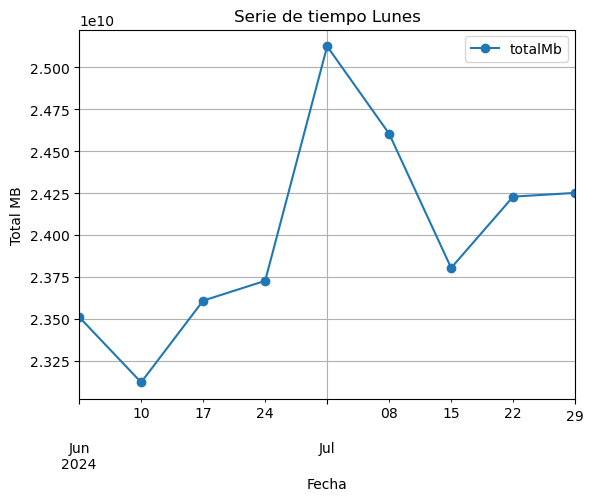

In [58]:
lunes.plot(x='fecha', y='totalMb', kind='line', marker='o')
# Mostrar la gráfica
plt.title('Serie de tiempo Lunes')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.grid()
plt.show()

In [59]:
filas_martes= df_or[df_or['dia_semana'] == 'Martes']
filas_martes.head()

,fecha,altan_site_id,totalMb,dia_semana
20328,2024-06-04,7,2.617870e+06,Martes
20329,2024-06-04,8,2.616950e+06,Martes
20330,2024-06-04,9,1.515551e+06,Martes
20331,2024-06-04,10,4.291176e+06,Martes
20332,2024-06-04,11,3.371816e+06,Martes


In [60]:
martes=filas_martes.groupby('fecha').agg({'totalMb':'sum'}).reset_index()
martes.head()

,fecha,totalMb
0,2024-06-04,2.359690e+10
1,2024-06-11,2.410764e+10
2,2024-06-18,2.395429e+10
3,2024-06-25,2.418893e+10
4,2024-07-02,2.410146e+10


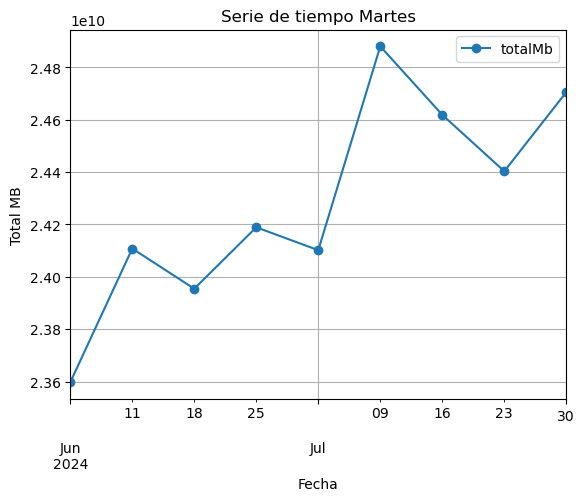

In [61]:
martes.plot(x='fecha', y='totalMb', kind='line', marker='o')
# Mostrar la gráfica
plt.title('Serie de tiempo Martes')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.grid()
plt.show()

In [63]:
filas_miercoles= df_or[df_or['dia_semana'] == 'Miércoles']
filas_miercoles.head()

,fecha,altan_site_id,totalMb,dia_semana
27104,2024-06-05,7,2.613254e+06,Miércoles
27105,2024-06-05,8,2.494541e+06,Miércoles
27106,2024-06-05,9,1.606973e+06,Miércoles
27107,2024-06-05,10,4.548700e+06,Miércoles
27108,2024-06-05,11,3.283344e+06,Miércoles


In [64]:
miercoles=filas_miercoles.groupby('fecha').agg({'totalMb':'sum'}).reset_index()
miercoles.head()

,fecha,totalMb
0,2024-06-05,2.368501e+10
1,2024-06-12,2.419409e+10
2,2024-06-19,2.403243e+10
3,2024-06-26,2.431675e+10
4,2024-07-03,2.433519e+10


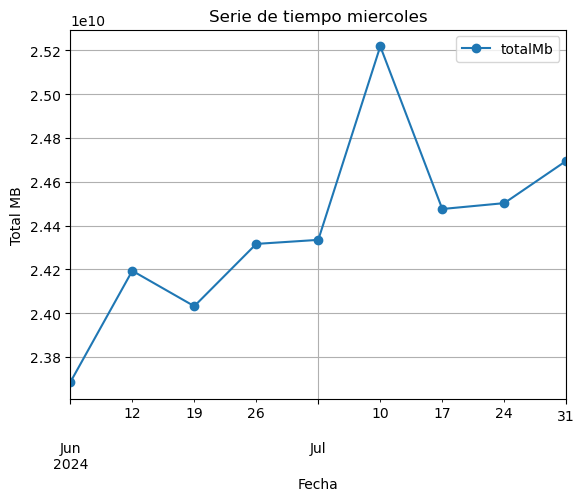

In [65]:
miercoles.plot(x='fecha', y='totalMb', kind='line', marker='o')
# Mostrar la gráfica
plt.title('Serie de tiempo miercoles')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.grid()
plt.show()

In [66]:
filas_jueves= df_or[df_or['dia_semana'] == 'Jueves']
filas_miercoles.head()

,fecha,altan_site_id,totalMb,dia_semana
27104,2024-06-05,7,2.613254e+06,Miércoles
27105,2024-06-05,8,2.494541e+06,Miércoles
27106,2024-06-05,9,1.606973e+06,Miércoles
27107,2024-06-05,10,4.548700e+06,Miércoles
27108,2024-06-05,11,3.283344e+06,Miércoles


In [67]:
jueves=filas_jueves.groupby('fecha').agg({'totalMb':'sum'}).reset_index()
jueves.head()

,fecha,totalMb
0,2024-06-06,2.368762e+10
1,2024-06-13,2.434293e+10
2,2024-06-20,2.428090e+10
3,2024-06-27,2.435309e+10
4,2024-07-04,2.445106e+10


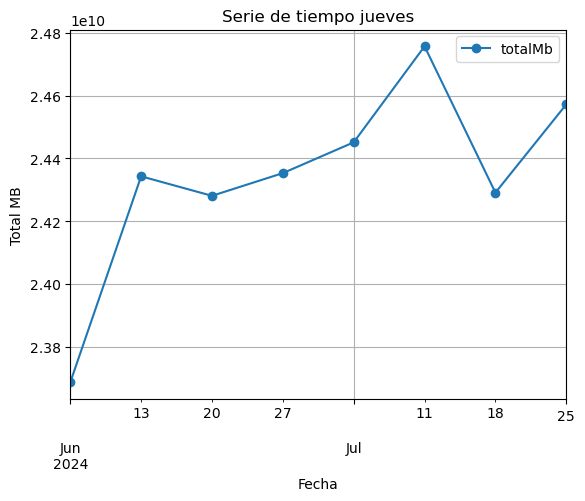

In [68]:
jueves.plot(x='fecha', y='totalMb', kind='line', marker='o')
# Mostrar la gráfica
plt.title('Serie de tiempo jueves')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.grid()
plt.show()

In [69]:
filas_viernes= df_or[df_or['dia_semana'] == 'Viernes']
filas_viernes.head()

,fecha,altan_site_id,totalMb,dia_semana
40656,2024-06-07,7,3.036111e+06,Viernes
40657,2024-06-07,8,2.322202e+06,Viernes
40658,2024-06-07,9,1.570753e+06,Viernes
40659,2024-06-07,10,4.976908e+06,Viernes
40660,2024-06-07,11,3.283272e+06,Viernes


In [70]:
viernes=filas_viernes.groupby('fecha').agg({'totalMb':'sum'}).reset_index()
viernes.head()

,fecha,totalMb
0,2024-06-07,2.387096e+10
1,2024-06-14,2.447790e+10
2,2024-06-21,2.438180e+10
3,2024-06-28,2.452858e+10
4,2024-07-05,2.456942e+10


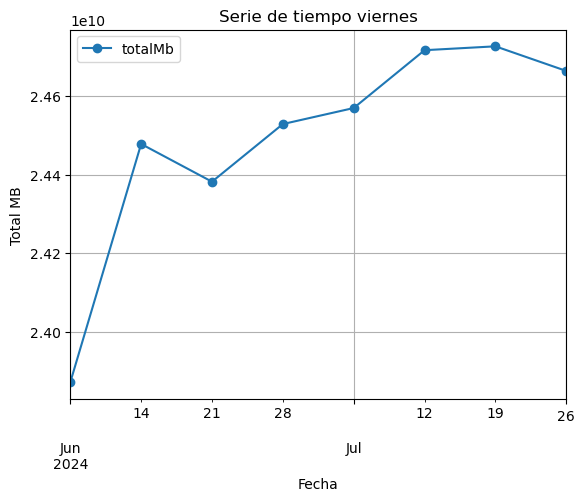

In [71]:
viernes.plot(x='fecha', y='totalMb', kind='line', marker='o')
# Mostrar la gráfica
plt.title('Serie de tiempo viernes')
plt.xlabel('Fecha')
plt.ylabel('Total MB')
plt.grid()
plt.show()

In [49]:
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [50]:
df_conbinado.shape

(79027248, 13)

In [73]:
df_hor=df_conbinado.groupby(['fecha', 'hora',]).agg({'totalMb': 'sum'}).reset_index()
df_hor.head()

MemoryError: Unable to allocate 603. MiB for an array with shape (79027248,) and data type int64

In [52]:
df_conbinado['dia_semana'] = df_conbinado['fecha'].dt.day_name(locale="es_Es")
df_conbinado.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [45]:
df_or['hora'] = pd.to_datetime(df_or['hora'])
print(df_or.dtypes)

KeyError: 'hora'

In [17]:
Dsem=df_or.groupby('dia_semana').agg({'totalMb':'sum'}).reset_index()
Dsem.head(7)

,dia_semana,totalMb
0,Domingo,2.143116e+11
1,Jueves,1.947348e+11
2,Lunes,2.159883e+11
3,Martes,2.185552e+11
4,Miércoles,2.194568e+11
5,Sábado,2.191153e+11
6,Viernes,1.959357e+11


In [18]:
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Convertir la columna 'Dia_de_semana' en una categoría con el orden correcto
df_or['dia_semana'] = pd.Categorical(df_or['dia_semana'], categories=orden_dias, ordered=True)

In [19]:
Dseo=df_or.groupby('dia_semana').agg({'totalMb':'sum'}).reset_index()
Dseo.head(7)

C:\Users\jherreraq1900\AppData\Local\Temp\ipykernel_3300\473370565.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Dseo=df_or.groupby('dia_semana').agg({'totalMb':'sum'}).reset_index()


,dia_semana,totalMb
0,Lunes,2.159883e+11
1,Martes,2.185552e+11
2,Miércoles,2.194568e+11
3,Jueves,1.947348e+11
4,Viernes,1.959357e+11
5,Sábado,2.191153e+11
6,Domingo,2.143116e+11


In [20]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

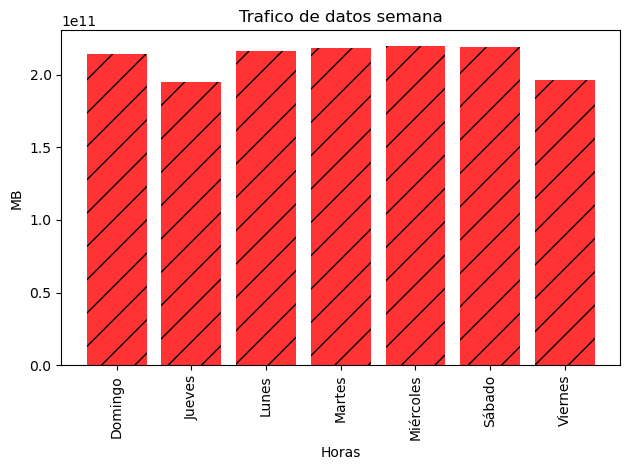

In [21]:
plt.bar(Dsem['dia_semana'],Dsem['totalMb'],width=0.8,color='red',alpha=0.8,hatch='/')
#plt.ylim(33.25,34.57)
plt.title('Trafico de datos semana')
plt.xlabel('Horas')
plt.ylabel('MB')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [22]:
df=df_conbinado.groupby(['fecha', 'altan_site_id']).agg({'totalMb': 'sum'}).reset_index()
df.head()

,fecha,altan_site_id,totalMb
0,2024-06-01,7,2.218672e+06
1,2024-06-01,8,1.708228e+06
2,2024-06-01,9,1.706564e+06
3,2024-06-01,10,4.844851e+06
4,2024-06-01,11,3.225259e+06


In [23]:
Dsem.head()

,dia_semana,totalMb
0,Domingo,2.143116e+11
1,Jueves,1.947348e+11
2,Lunes,2.159883e+11
3,Martes,2.185552e+11
4,Miércoles,2.194568e+11


In [24]:
import numpy as np

In [25]:
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [26]:
dfc=df_conbinado.groupby(['fecha','hora', 'altan_site_id']).agg({'totalMb': 'sum'}).reset_index()
dfc.head()

,fecha,hora,altan_site_id,totalMb
0,2024-06-01,00:00,7,65538.648784
1,2024-06-01,00:00,8,43276.295272
2,2024-06-01,00:00,9,65417.329712
3,2024-06-01,00:00,10,182276.866472
4,2024-06-01,00:00,11,125243.120760


In [27]:
dfc.head()

,fecha,hora,altan_site_id,totalMb
0,2024-06-01,00:00,7,65538.648784
1,2024-06-01,00:00,8,43276.295272
2,2024-06-01,00:00,9,65417.329712
3,2024-06-01,00:00,10,182276.866472
4,2024-06-01,00:00,11,125243.120760


In [28]:
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [29]:
df_filtrado = df_conbinado[df_conbinado['totalMb'] != 0]
df_filtrado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [30]:
df_filtradoCE= df_conbinado[df_conbinado['totalMb'] == 0]

In [31]:
df_filtradoCE.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
25,2024-06-01,01:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
26,2024-06-01,02:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
28,2024-06-01,04:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
29,2024-06-01,05:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
49,2024-06-01,01:00,7,1,27,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0


In [32]:
df_filtradoCE7 = df_filtradoCE[df_filtradoCE['altan_site_id'] == 7]
df_filtradoCE7.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
25,2024-06-01,01:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
26,2024-06-01,02:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
28,2024-06-01,04:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
29,2024-06-01,05:00,7,1,24,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0
49,2024-06-01,01:00,7,1,27,activo,0,0,21.8734,-102.26918,0.0,0.0,0.0


In [33]:
df_filtradoCE7.shape

(1213, 13)

In [34]:
conteo_valores = df_filtradoCE['altan_site_id'].value_counts()
conteo_valores.head(-7)

altan_site_id
80615     17568
230042    17568
190002    17568
80093     17568
300027    17568
          ...  
291149        1
190699        1
190570        1
220407        1
190223        1
Name: count, Length: 6633, dtype: int64

In [35]:
conteo_valores.shape

(6640,)

In [36]:
Ordenada= conteo_valores.sort_values()
Ordenada.head(-7)

altan_site_id
190476        1
291453        1
230335        1
190512        1
190542        1
          ...  
190441    13176
220086    13176
60253     13176
140475    13176
140453    13562
Name: count, Length: 6633, dtype: int64

In [37]:
df_fecha=df_filtrado.groupby(['fecha']).agg({'altan_site_id': 'sum'}).reset_index()
df_fecha.head()

,fecha,altan_site_id
0,2024-06-01,186767126928
1,2024-06-02,186527966595
2,2024-06-03,186371272619
3,2024-06-04,186577999829
4,2024-06-05,187328208773


In [38]:
df_hora=df_filtrado.groupby(['hora']).agg({'altan_site_id': 'sum'}).reset_index()
df_hora.head()

,hora,altan_site_id
0,00:00,485084359701
1,01:00,451028604813
2,02:00,439239446647
3,03:00,426648173851
4,04:00,420980969231


In [39]:
valores_unicos = df_filtrado['altan_site_id'].unique()
print(valores_unicos)

[     7      8      9 ... 191635 230446 290654]


In [40]:
print(df_filtrado.dtypes)

fecha                                   object
hora                                    object
altan_site_id                            int64
sector                                   int64
cell_id                                  int64
estado                                  object
l_thrp_bits_dl                           int64
l_thrp_bits_ul                           int64
cast(ctgs.latitud as decimal(9,5))     float64
cast(ctgs.longitud as decimal(9,5))    float64
Mb_dl                                  float64
Mb_ul                                  float64
totalMb                                float64
dtype: object


In [41]:
df_filtrado['fecha'] = pd.to_datetime(df_filtrado['fecha'])
print(df_filtrado.dtypes)

fecha                                  datetime64[ns]
hora                                           object
altan_site_id                                   int64
sector                                          int64
cell_id                                         int64
estado                                         object
l_thrp_bits_dl                                  int64
l_thrp_bits_ul                                  int64
cast(ctgs.latitud as decimal(9,5))            float64
cast(ctgs.longitud as decimal(9,5))           float64
Mb_dl                                         float64
Mb_ul                                         float64
totalMb                                       float64
dtype: object


C:\Users\jherreraq1900\AppData\Local\Temp\ipykernel_3300\2014936449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['fecha'] = pd.to_datetime(df_filtrado['fecha'])


In [42]:
df_fecha1=df_filtrado.groupby(['fecha']).agg({'altan_site_id': 'sum'}).reset_index()
df_fecha1.head()

,fecha,altan_site_id
0,2024-06-01,186767126928
1,2024-06-02,186527966595
2,2024-06-03,186371272619
3,2024-06-04,186577999829
4,2024-06-05,187328208773


In [43]:
print(df_fecha1.dtypes)

fecha            datetime64[ns]
altan_site_id             int64
dtype: object
